**Title** : Calculation of heat susceptibility index to measure the high night temperature tolerance in winter canola

This project aims to write the python codes to calculate the heat susceptibility indices (HSI) for yield in response to high night temperature (HNT) in winter canola genotypes. HSI is widely used to classify large number of genotypes in to tolerent and susceptible genotypes based on yield response under stressful environments. 
HSI is calculated using the following formula as by Fisher and Maurer (1978).

$$HSI = \frac{1-\frac{YD}{YP}}{D}$$

 HSI= Heat susceptibility index
 
 YD = mean of the trait for each genotype under HNT stress
 
 YP = mean of the trait for each genotype under control
 
 D = 1- [mean YD of all genotypes under HNT/mean YP of all genotypes under Control]

**Inputs**: 

This program uses a total seed weight per plant(g) data file collected from ten canola genotypes under control and HNT exposure for calculating heat susceptibility indices. The data file contains four columns: geno, trt, rep and TSW.

'geno' represents genotypes of winter canola.

'trt' represents treatments used in the experiments.
* Control (23/15°C: day/night) and HNT (23/20°C: day/night) are the two trearments.

'rep' represents the replications within the treatments.

'TSW' represents total seed weight per plant (g). 

**Outputs** 
1. Heat susceptibility index values for yield in ten canola genotypes (table).

2. Identification of tolerant and susceptible canola genotypes based on calculated HSI values.

3. Analysis of variance (ANOVA) 


**Rationale** 

I have been exploring the impact of HNT stress on various physiological and agronomic traits in diverse sets of winter canola genotypes. Calculating HSI values separately for various traits in large number of genotypes will be tedious and time consuming. This coding will also avoid the potential mannual miscalculations. Thus, this program will help me to effectively select contrasting lines using HSI values for specific trait in canola. This code might be useful for other researchers studying abiotic stress tolerance in crops.

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison

In [2]:
# Importing data
# Working with uploaded data files by making datasets folder in the repository 
df= pd.read_csv('datasets/HNT_TSW_Data.csv')    # Reading data using pandas
df.head(6)

,geno,trt,rep,TSW
0,Mercedes,Control,1,33.00
1,Mercedes,Control,2,34.55
2,Mercedes,Control,3,27.77
3,Mercedes,HNT,1,30.85
4,Mercedes,HNT,2,25.73
5,Mercedes,HNT,3,29.65


In [3]:
# Handling with missing values
df.isna().sum()                 # Checking missing values in the dataframe
df= df.fillna(method='pad')     # Filling missing values with immediate front values

In [4]:
df.insert(0, "GenoTrt", "")
df['GenoTrt'] = df['geno'] + df['trt']
df


,GenoTrt,geno,trt,rep,TSW
0,MercedesControl,Mercedes,Control,1,33.00
1,MercedesControl,Mercedes,Control,2,34.55
2,MercedesControl,Mercedes,Control,3,27.77
3,MercedesHNT,Mercedes,HNT,1,30.85
4,MercedesHNT,Mercedes,HNT,2,25.73
5,MercedesHNT,Mercedes,HNT,3,29.65
6,Edimax CLControl,Edimax CL,Control,1,32.59
7,Edimax CLControl,Edimax CL,Control,2,30.61
8,Edimax CLControl,Edimax CL,Control,3,36.46
9,Edimax CLHNT,Edimax CL,HNT,1,24.12


In [47]:
genotrt_list = df.GenoTrt
genotrt_list = list(set(genotrt_list))
genotrt_list.sort()
print(genotrt_list)
genotype_list = df.geno
genotype_list = list(set(genotype_list))
genotype_list.sort()
print(genotype_list)

['46W94Control', '46W94HNT', 'DKW44-10Control', 'DKW44-10HNT', 'DKW46-15Control', 'DKW46-15HNT', 'Edimax CLControl', 'Edimax CLHNT', 'HekipControl', 'HekipHNT', 'HyCLASS225WControl', 'HyCLASS225WHNT', 'MercedesControl', 'MercedesHNT', 'PopularControl', 'PopularHNT', 'RileyControl', 'RileyHNT', 'WichitaControl', 'WichitaHNT']
['46W94', 'DKW44-10', 'DKW46-15', 'Edimax CL', 'Hekip', 'HyCLASS225W', 'Mercedes', 'Popular', 'Riley', 'Wichita']


In [37]:
# Calculate means of each genotypes in each treatment 
df_means = df.groupby(["geno", "trt"]).mean()
print(df_means)

                     rep        TSW
geno        trt                    
46W94       Control    2  27.690000
            HNT        2  29.060000
DKW44-10    Control    2  19.183333
            HNT        2  13.800000
DKW46-15    Control    2  22.990000
            HNT        2  16.906667
Edimax CL   Control    2  33.220000
            HNT        2  29.216667
Hekip       Control    2  23.176667
            HNT        2  19.353333
HyCLASS225W Control    2  31.766667
            HNT        2  17.410000
Mercedes    Control    2  31.773333
            HNT        2  28.743333
Popular     Control    2  31.613333
            HNT        2  28.350000
Riley       Control    2  24.146667
            HNT        2  19.943333
Wichita     Control    2  18.973333
            HNT        2  14.183333


In [41]:
df_means.insert(2, "genotreat", genotrt_list)
df_means

rep        TSW           genotreat
geno        trt                                        
46W94       Control    2  27.690000        46W94Control
            HNT        2  29.060000            46W94HNT
DKW44-10    Control    2  19.183333     DKW44-10Control
            HNT        2  13.800000         DKW44-10HNT
DKW46-15    Control    2  22.990000     DKW46-15Control
            HNT        2  16.906667         DKW46-15HNT
Edimax CL   Control    2  33.220000    Edimax CLControl
            HNT        2  29.216667        Edimax CLHNT
Hekip       Control    2  23.176667        HekipControl
            HNT        2  19.353333            HekipHNT
HyCLASS225W Control    2  31.766667  HyCLASS225WControl
            HNT        2  17.410000      HyCLASS225WHNT
Mercedes    Control    2  31.773333     MercedesControl
            HNT        2  28.743333         MercedesHNT
Popular     Control    2  31.613333      PopularControl
            HNT        2  28.350000          PopularHNT
Riley       Control    2  24.146667        RileyControl
            HNT        2  19.943333            RileyHNT
Wichita     Control    2  18.973333      WichitaControl
            HNT        2  14.183333          WichitaHNT

In [24]:
# Calculate means of each genotypes in each treatment 
df_All_means = df.groupby(["trt"]).mean()
YP_All = df_All_means.TSW[0]
YD_All = df_All_means.TSW[1]
D = 1 - (YD_All / YP_All)
D

0.17981350806451635

In [45]:
def Compute_HSI (y):
    
    newdf = pd.DataFrame([], columns=['Genotype', 'HSI'])
    for x in genotype_list:
        control = x + 'Control'
        stress = x + 'HNT'
        YP = df_means[df_means['genotreat']==control][y]
        YP = float(YP)
        YD = df_means[df_means['genotreat']==stress][y]
        YD = float(YD)
        HSI = (1 - (YD / YP)) / D
        newdf = newdf.append({'Genotype': x, 'HSI' : HSI}, ignore_index=True)
    return(newdf)

In [46]:
HSI = Compute_HSI('TSW')
HSI

,Genotype,HSI
0,46W94,-0.275154
1,DKW44-10,1.560648
2,DKW46-15,1.471568
3,Edimax CL,0.670193
4,Hekip,0.917421
5,HyCLASS225W,2.513389
6,Mercedes,0.530344
7,Popular,0.574075
8,Riley,0.968087
9,Wichita,1.404008


In [12]:
HSI.insert(2,"Susceptibility", "")

for x in range(0,len(HSI)):
    if HSI.HSI[x] < 1:
        HSI.Susceptibility[x] = "Resistant"
    else:
        HSI.Susceptibility[x] = "Susceptible"

C:\Users\mns_p\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\mns_p\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [13]:
HSI

,Genotype,HSI,Susceptibility
0,46W94,-0.275154,Resistant
1,DKW44-10,1.560648,Susceptible
2,DKW46-15,1.471568,Susceptible
3,Edimax CL,0.670193,Resistant
4,Hekip,0.917421,Resistant
5,HyCLASS225W,2.513389,Susceptible
6,Mercedes,0.530344,Resistant
7,Popular,0.574075,Resistant
8,Riley,0.968087,Resistant
9,Wichita,1.404008,Susceptible


The analysis of vaiance (ANOVA) was performed to analyze the impact of HNT on total seed weight per plant in canola genotypes.This operation also tests the usefulness of the concept of HSI to identify the tolerant and susceptible genotypes under stressful environments. The mean separation between the treatments for each genotypes was conducted to see whether the above identified tolerant and susceptible genotypes show statistical significant different among the tretments or not. 

In [86]:
# Printing some useful properties of the datasets
print(df['geno'].unique())     
print(df['trt'].unique())       
print(df['rep'].unique())      
print(df.shape) 

['Mercedes' 'Edimax CL' 'Popular' '46W94' 'Wichita' 'Riley' 'DKW44-10'
 'DKW46-15' 'HyCLASS225W' 'Hekip']
['Control' 'HNT']
[1 2 3]
(60, 4)


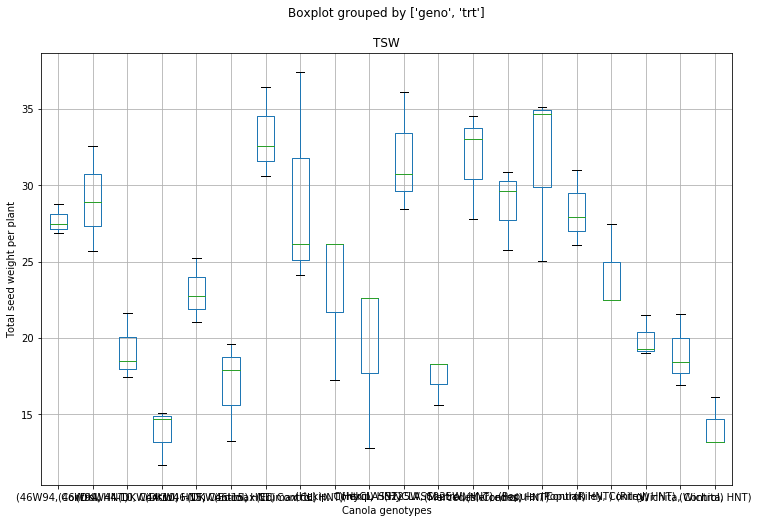

In [112]:
# Preliminery examinaion of the total seed weight per plant between the treatment for all ten genotypes using boxplots
# plt.figure(figsize=(12,8))
df.boxplot(column=['TSW'], by= ['geno','trt'], figsize=(12,8))
plt.xlabel('Canola genotypes')
plt.ylabel('Total seed weight per plant')
plt.show()

In [ ]:
figsize=(12,8)

In [88]:
# ANOVA with treatments, genotypes and their interactions
formula = 'TSW ~ C(geno) + C(trt) + C(geno)* C(trt)'
model = ols(formula,data= df).fit()
anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(geno),9.0,1713.938267,190.437585,15.261340,2.217186e-10
C(trt),1.0,339.388167,339.388167,27.197983,5.950718e-06
C(geno):C(trt),9.0,208.209200,23.134356,1.853947,8.810097e-02
Residual,40.0,499.137267,12.478432,NaN,NaN


In [ ]:
# Comparison of Means of total seed weight per plant between control and HNT treatments in canola genotypes 
mean_comparison= MultiComparison(df['TSW'],df['trt']).tukeyhsd(alpha=0.05)
print(mean_comparison)

In [ ]:
# Create a histogram to show the variations in total seed weight between control and HNT in canola genotypes